梯度下降法  
不是一个机器学习算法  
是一种基于搜索的最优化方法  
作用：最小化一个损失函数  
梯度上升法：最大化一个效用函数

在一个 参数theta——损失函数J  \ \ \ 构成的二维曲线中   
$\dfrac {dJ}{d\theta }$ 的正负号，表示在参数theta轴上，J增大的方向  
其值表示增长的快慢  
那么$-\dfrac {dJ}{d\theta }$就表示J减少的方向  

$\eta$成为学习率  
$\eta$的取值会影响获得最优解的速度  
$\eta$取值不合适，甚至不能得到最优解，如果J越来越大，说明有可能$\eta$取的大了  
$\eta$是梯度下降的一个超参数

并不是所有的函数的极值点都是唯一的  
解决方案：（找全局最优解）  
多次运行，随机化初始点  
梯度下降法的初始点也是一个超参数  
  
线性回归法的损失函数具有唯一的最优解

## 梯度下降法模拟

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 只有一个参数的情况

In [2]:
#用plot（）画曲线，为了平滑，要取足够多的点，这里等间距取141个点
plot_x = np.linspace(-1, 6, 141)
# 先去点的的x坐标，然后得到其y坐标，最后绘制出来
plot_y = (plot_x - 2.5) ** 2 - 1
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

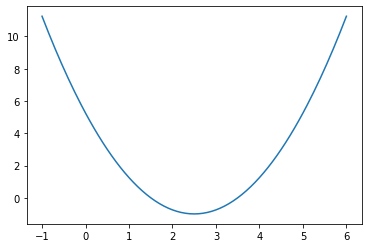

In [3]:
plt.plot(plot_x, plot_y)

In [4]:
def dJ(theta):
    # 对上面的函数求导，函数是固定的
    return 2 * (theta - 2.5)

In [5]:
def J(theta):
    return (theta - 2.5) ** 2 - 1 

In [6]:
eta = 0.1
epsilon = 1e-8
#theta设置一个初始值，为0
theta = 0.0
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    # 理论上导数为0的时候，就找到了极值点，但是实际使用中有可能一直找不到整整为0的点，而只能达到很接近0的一个范围
    # 对浮点数进行 ==0 是很危险的，计算机处理浮点数是有误差的，可能永远都达不到想要的精度
    
    # 两种思路解决，一种是前后的函数值差小于一个极小值，一种是梯度小于一个极小值，其实意义一样
    #if(abs(J(theta) -J(last_theta) ) < epsilon):    
    if(abs(gradient) < epsilon):
        print(gradient)
        break

print(theta)
print(J(theta))

-9.485686902621637e-09
2.4999999962057253
-1.0


-0.00027222589353748106


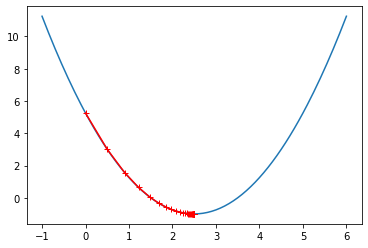

In [7]:
# 初始值theta为0
theta = 0.0
theta_history  = [theta]
while True:
    grandient = dJ(theta)
    last_theta = theta
    theta = theta - eta * grandient
    # 理论上导数为0的时候，就找到了极值点，但是实际使用中有可能一直找不到整整为0的点，而只能达到很接近0的一个范围
    # 对浮点数进行 ==0 是很危险的，计算机处理浮点数是有误差的，可能永远都达不到想要的精度
    
    
    theta_history.append(theta)
    # 两种思路解决，一种是前后的函数值差小于一个极小值，一种是梯度小于一个极小值，其实意义一样
    if(abs(J(theta) -J(last_theta) ) < epsilon):  # 找了45次  break时，梯度为-0.00027
    #if(abs(grandient) < epsilon): # 找了91次，break时，梯度为10的-9次方级
    #if (abs(grandient) < epsilon) and (abs(J(theta) -J(last_theta) ) < epsilon):
        print(grandient)
        break
        
plt.plot(plot_x, plot_y)
# plt.plot(theta_history, J(theta_history), color = 'r', markers = '+')
# 这里必须将theta_history转成array类型，是因为J()的返回值涉及到减法，而要想将数组内的元素全都执行一个
# 数学运算，list是不支持的，而array是支持的。
plt.plot(np.array(theta_history), J(np.array(theta_history)), color = 'r', marker = '+')

plt.show()

In [8]:
len(theta_history)

46

In [9]:
def gradient_descent(initial_theta, eta, epslion = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        # 理论上导数为0的时候，就找到了极值点，但是实际使用中有可能一直找不到整整为0的点，而只能达到很接近0的一个范围
        # 对浮点数进行 ==0 是很危险的，计算机处理浮点数是有误差的，可能永远都达不到想要的精度
    
    
        theta_history.append(theta)
        # 两种思路解决，一种是前后的函数值差小于一个极小值，一种是梯度小于一个极小值，其实意义一样
        if(abs(J(theta) -J(last_theta) ) < epsilon):  # 找了45次  
        #if(abs(grandient) < epsilon): # 找了91次，为什么会不一样呢？
        #if (abs(grandient) < epsilon) and (abs(J(theta) -J(last_theta) ) < epsilon):
            break
    
def plot_theta_histroy():
    plt.plot(plot_x, plot_y)
    # plt.plot(theta_history, J(theta_history), color = 'r', markers = '+')
    # 这里必须将theta_history转成array类型，是因为J()的返回值涉及到减法，而要想将数组内的元素全都执行一个
    # 数学运算，list是不支持的，而array是支持的。
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color = 'r', marker = '+')

    plt.show()

In [16]:
# eta的设置，只要能让J()不断降低就行，不一定theta非要一直在极小值点的某一侧。
eta = 0.8
theta_history =[]
gradient_descent(0, eta)

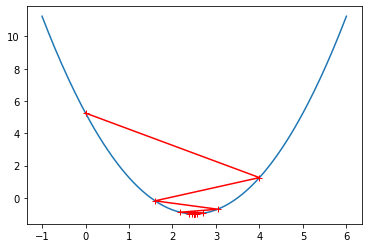

In [17]:
plot_theta_histroy()

In [15]:
len(theta_history)

3682

如果学习率大了，在迭代的时候，梯度会越来越大，导致theta会越来越偏离极小值点，形成死循环。为了解决这个问题，可以设置一个最大迭代次数

In [18]:
#  加入了迭代次数之后的改进
def gradient_descent(initial_theta, eta, n_iters = 1e4, epslion = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
         
    while i_iter < n_iters :
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        # 理论上导数为0的时候，就找到了极值点，但是实际使用中有可能一直找不到整整为0的点，而只能达到很接近0的一个范围
        # 对浮点数进行 ==0 是很危险的，计算机处理浮点数是有误差的，可能永远都达不到想要的精度
    
    
        theta_history.append(theta)
        # 两种思路解决，一种是前后的函数值差小于一个极小值，一种是梯度小于一个极小值，其实意义一样
        if(abs(J(theta) -J(last_theta) ) < epsilon):  # 找了45次  
        #if(abs(grandient) < epsilon): # 找了91次，为什么会不一样呢？
        #if (abs(grandient) < epsilon) and (abs(J(theta) -J(last_theta) ) < epsilon):
            break        
        
        i_iter += 1
    return

In [21]:
eta = 1.1
theta_history =[]
gradient_descent(0, eta)

OverflowError: (34, 'Result too large')

In [20]:
len(theta_history)

22